# Smart Selectors

In [1]:
%load_ext autoreload
%autoreload 2

Let's start by defining a task.

In [2]:
from metricx import Metric, Task

task = Task(
    name="task",
    metrics=[
        Metric(name="score", is_higher_better=True),
    ],
)

Now suppose we have three models whose performance on the task is distributed as follows.

In [3]:
import numpy as np

models = {
    "model-A": lambda: np.random.normal(loc=0.0, scale=3.0),
    "model-B": lambda: np.random.normal(loc=10.0, scale=1.0),
    "model-C": lambda: np.random.normal(loc=1.0, scale=1.0),
    "model-D": lambda: np.random.normal(loc=-1.0, scale=0.5),
}
for model, func in models.items():
    task.report(model, {"score": func()})

The selector provides a method to help you choose the next model to evaluate on this task. It allows you to customize the policy used to select models. The default policy is to start by obtaining 3 samples for each model and then transitioning to randomly choosing between several heuristic policies ranging from standard errors to power analysis.

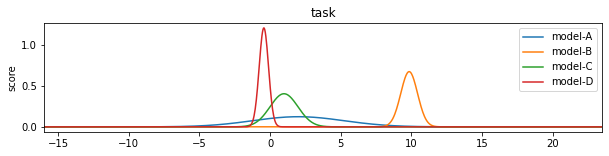

In [4]:
from copy import deepcopy
from metricx import Selector

selector = Selector(task)
for _ in range(20):
    model = selector.propose()
    task.report(model, {"score": models[model]()})
task.to_figure();

Although the usage of the Selector class is optional, it's highly recommended as it can reduce the number of samples needed to be able to confidently determine the ranking of the models.